# Supervised Learning Capstone

## I. Context for House Prices

Those who have experienced the headache of real estate pricing know that, at times, the price can be decided rather arbitrarily rather than derived statistically. This creates two major problems for both the buyer and the seller: first, the seller has difficulty in accurately calculating his selling price, and, second, the buyer has difficulty in verifying the validity of the selling price. As a result, it is not uncommon for the less-informed of the two parties to lose thousands of dollars because he/she lacks the knowledge to back their pricing choices.

This [dataset]('https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview') is based on the residential homes in Ames, Iowa, and contains 79 explanatory variables used for predicting the target variable of house price in this market. For this project, we will begin with (**II**) a quick introduction to the data, (**III**) propose the research question, (**IV-XII**) jump back and forth between feature engineering and model tuning, and finally (**XIII**) conclude with the model's value.

## II. Introduction to the Data

For a full list of all 80 of the dataset's features: 

* SalePrice - the property's sale price in dollars (**target variable**)
* MSSubClass: The building class 
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property (259 NaN values)
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access (1369 NaN values)
* LotShape: General shape of property 
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property 
* Neighborhood: Physical locations within Ames city limits 
* Condition1: Proximity to main road or railroad 
* Condition2: Proximity to main road or railroad (if a second is present) 
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type - (8 NaN values)
* MasVnrArea: Masonry veneer area in square feet - (8 NaN values)
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement (37 NaN values)
* BsmtCond: General condition of the basement (37 NaN values)
* BsmtExposure: Walkout or garden level basement walls (38 NaN values)
* BsmtFinType1: Quality of basement finished area (37 NaN values)
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present) (37 NaN values)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system (1 NaN value)
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality (690 NaN values)
* GarageType: Garage location (81 NaN values)
* GarageYrBlt: Year garage was built (81 NaN values)
* GarageFinish: Interior finish of the garage (81 NaN values)
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality (81 NaN values)
* GarageCond: Garage condition (81 NaN values)
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality (1453 NaN values)
* Fence: Fence quality (1179 NaN values)
* MiscFeature: Miscellaneous feature not covered in other categories (1406 NaN values)
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

In [1]:
# Loading all necessary packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from feature_selector import FeatureSelector
from sklearn.model_selection import RandomizedSearchCV

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import f_regression, mutual_info_regression

In [2]:
# Loading the dataset
df = pd.read_csv('train.csv')
df.shape

(1460, 81)

In [3]:
# Observing the dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Seen below, the target variable isn't normally distributed, but there is a noticeable concentration at and gradually around the mean of the houses' sale prices.

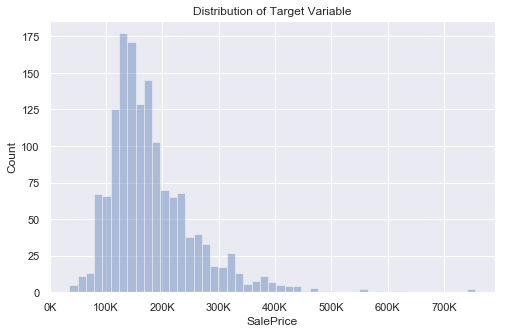

Mean of SalePrice:  180921.19589041095


In [4]:
# Observing the distribution of the target variable
sns.set(style="darkgrid")    
fig, ax = plt.subplots(figsize=(8, 5))    
g = sns.distplot(df.SalePrice,  kde=0, norm_hist=0)
plt.title('Distribution of Target Variable')
plt.xlabel('SalePrice')
plt.ylabel('Count')
xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels)
plt.show()

print("Mean of SalePrice: ", df.SalePrice.mean())

#### Addressing Missing Values

In [5]:
# Showing features with null values and the amount of NaN values
df[list(df.columns[df.isnull().sum() > 0])].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
# Filling NaN values with mean of 70.049 (feature has original std of 24.284)
df['LotFrontage'] = df.LotFrontage.fillna(df.LotFrontage.mean())
# Seems to infer NaN means that no alley exists: therefore, creating new categorical variable
df['Alley'] = df.Alley.fillna('None')
# Only 8 NaN values: joining them to 'None' category
df['MasVnrType'] = df.MasVnrType.fillna('None')
df['MasVnrArea'] = df.MasVnrArea.fillna(0)
# Seems to infer NaN means that no basement exists: therefore, creating new variable
df['BsmtQual'] = df.BsmtQual.fillna('None')
df['BsmtCond'] = df.BsmtCond.fillna('None')
df['BsmtExposure'] = df.BsmtExposure.fillna('None')
df['BsmtFinType1'] = df.BsmtFinType1.fillna('None')
df['BsmtFinType2'] = df.BsmtFinType2.fillna('None')
# One NaN value: adding to largest category
df['Electrical'] = df.Electrical.fillna('Sbrkr')
# Seems to infer NaN means that no fireplace exists: therefore, creating new variable
df['FireplaceQu'] = df.FireplaceQu.fillna('None')
# Seems to infer NaN means that no garage exists: therefore, creating new variable
df['GarageType'] = df.GarageType.fillna('None')
df['GarageYrBlt'] = df.GarageYrBlt.fillna(df.GarageYrBlt.min()) #filling with min because it is a numerical feature
df['GarageFinish'] = df.GarageFinish.fillna('None')
df['GarageQual'] = df.GarageQual.fillna('None')
df['GarageCond'] = df.GarageCond.fillna('None')
# Seems to infer NaN means that no pool exists: therefore, creating new variable
df['PoolQC'] = df.PoolQC.fillna('None')
# Seems to infer NaN means that no fence exists: therefore, creating new variable
df['Fence'] = df.Fence.fillna('None')
# Miscellaneous categories comprised of "Shed", "Othr", "Gar2" and "TenC": we will limit it to a Shed variable
df['Shed'] = np.where(df.MiscFeature == 'Shed', 1,0)
df = df.drop(['MiscFeature','Id'], 1)

In [7]:
# Observing types of data, unique, NaN, and sample in all features
def snapshot(data):
    '''Creates a DataFrame that gives snapshot of original dataset for preliminary cleaning and analysis.'''
    preliminary_details = pd.DataFrame()
    preliminary_details['Type'] = data.dtypes
    preliminary_details['Unique'] = data.nunique()
    preliminary_details['NaN'] = data.isnull().sum()
    preliminary_details['Sample'] = data.sample().T
    return preliminary_details
snapshot(df)

,Type,Unique,NaN,Sample
MSSubClass,int64,15,0,20
MSZoning,object,5,0,RL
LotFrontage,float64,111,0,70.05
LotArea,int64,1073,0,26142
Street,object,2,0,Pave
Alley,object,3,0,None
LotShape,object,4,0,IR1
LandContour,object,4,0,Lvl
Utilities,object,2,0,AllPub
LotConfig,object,5,0,CulDSac


## III. The Research Question

##### The Problem
As mentioned earlier, for those lacking the industry experience in real estate, they are at risk of buying overpriced as well as selling underpriced properties. Therefore, we want to be able to statistically predict the price of a house based on its specifications in order to provide the buyer/seller with a framework by which they can gauge the price of the house.

##### The Potential Solution
By creating a model that uses a wide variety of features, we will be able to **calculate the house price**. For the seller, this would allow them to input their specifications and have it return an estimated price based on the training dataset. For the buyer, this would allow them to assess deals based on the house specifications and determine whether a listing is over- or under-priced.

##### The Method of Testing
The design of the experiment is, by the use and selection of features, to effectively calculate the continuous variable of interest: house price. To do this, we will create a model and assess its results via cross-validation. If we can create a model that reasonably calculates with at least 85% accuracy, the experiment will be considered a success. To do this, we will employ the following regression models and select the best performing model: 
* Simple Linear Regression (OLS)
* KNN Regression
* Ridge Regression
* Lasso Regression
* Support Vector Regressor

## IV. Preparing Our Basic Feature Set (Feature Engineering Stage 1)

In [8]:
# Isolating the categorical features that will require dummies
df[df.dtypes[df.dtypes == 'object'].index].nunique()

MSZoning          5
Street            2
Alley             3
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        6
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
PoolQC            4
Fence             5
SaleType          9
SaleCondition     6
dtype: int64

In [9]:
# Creating our full feature set
features = df

# Creating dummy features from categorical variables
dummy_feature_names = list(df.dtypes[df.dtypes == 'object'].index)
for x in dummy_feature_names:
    features = pd.concat([features.drop(x, axis=1), pd.get_dummies(df[x], prefix=x)], axis=1)

print(features.shape)

# Confirming that there are no text variables
features.dtypes[features.dtypes == 'object']

(1460, 300)


Series([], dtype: object)

## V. Basic Modeling with Full Feature Set (Modeling Stage 1)
For reproducibility, henceforth, we will set the random state to 42 for all random functions.

In [10]:
# Creating our train-test split
X = features.drop('SalePrice',1)
y = features.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

### Model A: OLS Linear Regression (All Features)
Observing the base model of simple OLS Linear Regression on all features


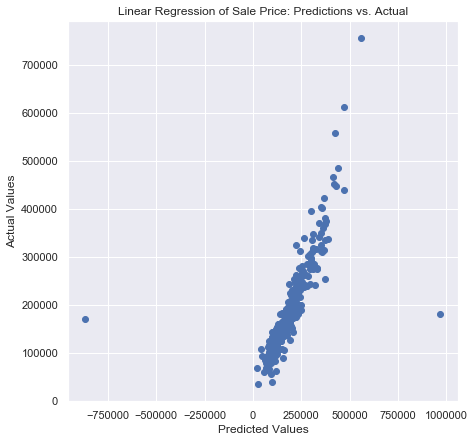


R-squared: 
 0.3381038859547606


In [11]:
# Creating multivariable linear model
linear = LinearRegression()
linear.fit(X_train, y_train)

plt.figure(figsize=[7,7])
pred = linear.predict(X_test)
plt.scatter(pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Linear Regression of Sale Price: Predictions vs. Actual')
plt.show()
print('\nR-squared: \n', linear.score(X_test, y_test))

### Model B: KNN Regression (All Features)
Similar to KNN Classifier, KNN Regression uses 𝑘 oberservations to vote for a value of the continuous target. For tuning, you can also control the weights.

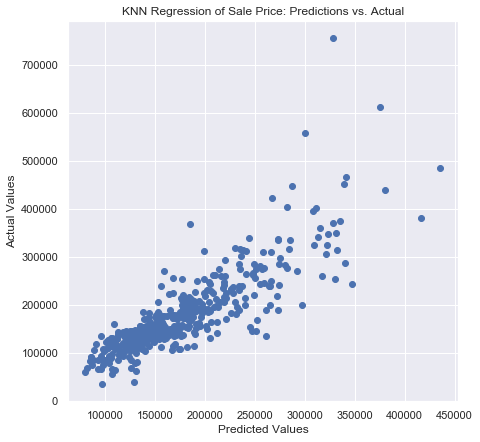


R-squared: 
 0.7020769894831889


In [12]:
# Creating KNN Regression model
knn = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)

plt.figure(figsize=[7,7])
pred = knn.predict(X_test)
plt.scatter(pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('KNN Regression of Sale Price: Predictions vs. Actual')
plt.show()
print('\nR-squared: \n', knn.score(X_test, y_test))

### Model C: Ridge Regression (All Features)
Expanding on the standard OLS regression, Ridge Regression imposes a penalty for large coefficients based on the sum of squared weights (L2 regularization). It represents the sum of the square of all model coefficients (numbered 1 through  𝑝 ), multiplied by the regularization parameter  𝜆 . As  𝜆  gets larger, the penalty for coefficient size also gets larger, and the solution that minimizes the cost function will by necessity have smaller coefficient estimates.

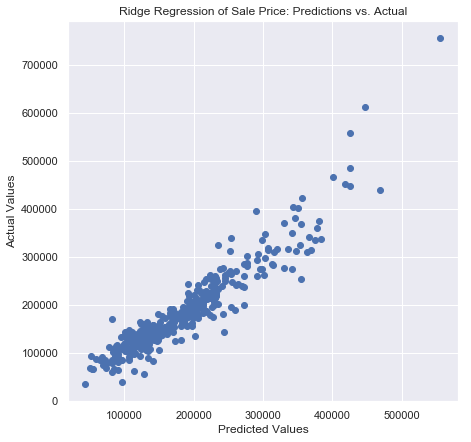


R-squared: 
 0.8834768495300412


In [13]:
# Creating Ridge Regression model
ridge = Ridge()
ridge.fit(X_train, y_train)

plt.figure(figsize=[7,7])
pred = ridge.predict(X_test)
plt.scatter(pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Ridge Regression of Sale Price: Predictions vs. Actual')
plt.show()
print('\nR-squared: \n', ridge.score(X_test, y_test))

### Model D: Lasso Regression (All Features)
Lasso (Least Absolute Shrinkage and Selection Operator) Regression, by penalizing the sum of the absolute values of the coefficients (L1 regularization), forces small parameter estimates to be equal to zero, effectively dropping them from the model. As a result, we can expect this model to perform reasonably well as well since this "feature selection" helps in preventing overfitting. 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


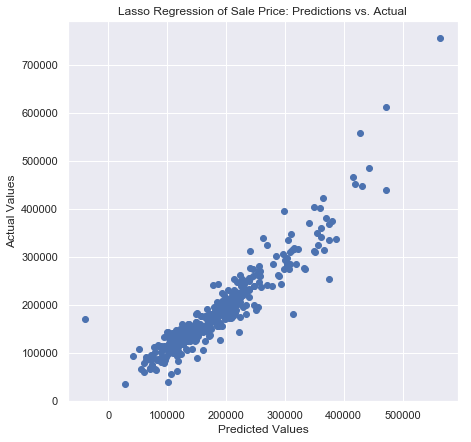


R-squared: 
 0.8787639049661913


In [14]:
# Creating lasso Regression model
lasso = Lasso()
lasso.fit(X_train, y_train)

plt.figure(figsize=[7,7])
pred = lasso.predict(X_test)
plt.scatter(pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Lasso Regression of Sale Price: Predictions vs. Actual')
plt.show()
print('\nR-squared: \n', lasso.score(X_test, y_test))

### Model E: Random Forest Regressor (All Features)
Random Forest Regression is an ensemble model that is comprised of a forest of decision trees that vote on the outcome for a given observation. For model tuning, one can control number of estimators, max depth, max features, etc. For reproducibility, we are also using random_state=42.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


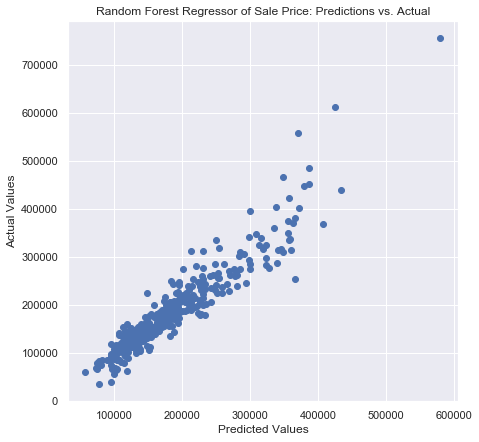


R-squared: 
 0.8812699366439899


In [15]:
# Creating Random Forest Regressor model
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

plt.figure(figsize=[7,7])
pred = rfr.predict(X_test)
plt.scatter(pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Random Forest Regressor of Sale Price: Predictions vs. Actual')
plt.show()
print('\nR-squared: \n', rfr.score(X_test, y_test))

### Model F: Support Vector Regression (All Features)
Support Vector Regression (SVR) operates much like an inversion of the classification problems of SVC. In classification we are only interested in the points closest to the boundary; in regression, we instead are only interested in values far away from the prediction. There are two major values we tune in SVR: C and epsilon. C is called the box constraint and sets the penalty for being outside of our margin. Epsilon sets the size of our margin. 

Much like SVC, we gather our data and find its distance from a specified point (previously the boundary, now the prediction) and optimize the cost from observations being outside the margin. This ends up being a huge advantage of SVM for regression because you can set the sensitivity when building the model - not just after the fact.

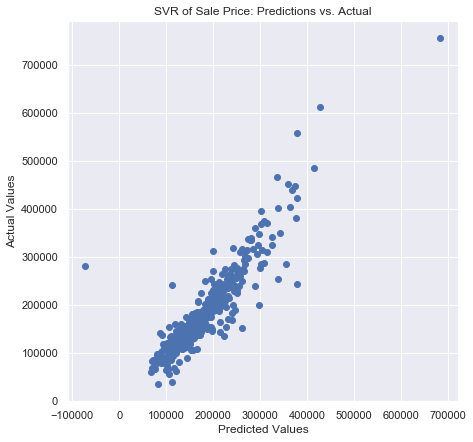


R-squared: 
 0.8131186579834507


In [16]:
# Creating SVR model 
svr = SVR(gamma='scale', C=10000000, epsilon=.2)
svr.fit(X_train, y_train)

plt.figure(figsize=[7,7])
pred = svr.predict(X_test)
plt.scatter(pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('SVR of Sale Price: Predictions vs. Actual')
plt.show()
print('\nR-squared: \n', svr.score(X_test, y_test))

In [17]:
# Compiling the r-squared scores
model_scores = pd.DataFrame()
model_scores['model'] = ['linear','knn','ridge','lasso','random_forest','svm']
model_scores['scores'] = [linear.score(X_test,y_test), 
                          knn.score(X_test, y_test),
                         ridge.score(X_test, y_test),
                         lasso.score(X_test, y_test),
                         rfr.score(X_test, y_test),
                         svr.score(X_test, y_test)]
model_scores

,model,scores
0,linear,0.338104
1,knn,0.702077
2,ridge,0.883477
3,lasso,0.878764
4,random_forest,0.881270
5,svm,0.813119


Unsurprisingly, the best performing models were the Ridge and Lasso (two extensions of OLS with penalties) and the Random Forest ensemble model. While we're above the accuracy goal of 85%, let's see if we can increase this score even more.

## VI. Refining Our Features (Feature Engineering Stage 2)

### Using Feature Selector to Select Most Valuable Features

In [18]:
# Setting up FeatureSelector
train = features.drop('SalePrice', 1)
train_labels = features.SalePrice

fs = FeatureSelector(data = train, labels = train_labels)

In [19]:
# Observing high-correlating variables
fs.identify_collinear(correlation_threshold=0.975)

14 features with a correlation magnitude greater than 0.97.



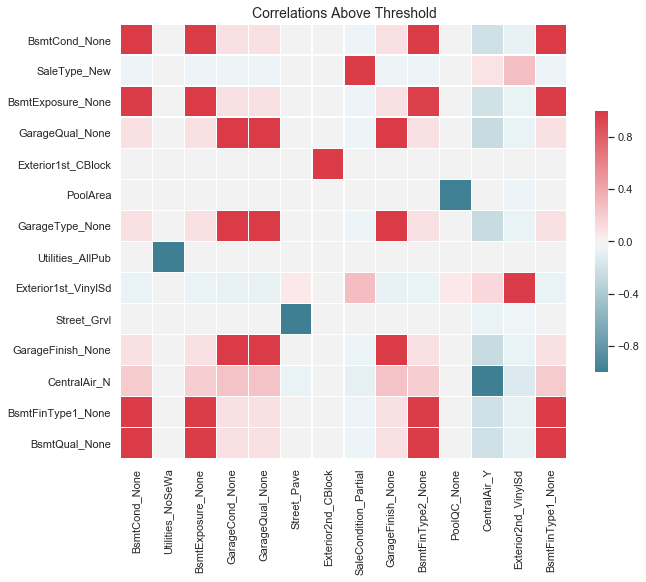

In [20]:
# Plotting high-correlating variables
fs.plot_collinear()

From the fourteen high-correlation variables, it appears that many of them are perfectly correlated and, therefore, unnecessary to keep in order to predict our target variable of SalePrice. Therefore, we will reduce all Garage-None variables to one feature and all Basement-None to one feature.

In [21]:
# Eliminating perfectly correlated variables to reduce feature set size
features['Basement_None'] = features.BsmtFinType1_None
features = features.drop(['BsmtFinType1_None', 'BsmtExposure_None','BsmtQual_None','BsmtCond_None'], 1)

features['Garage_None'] = features.GarageType_None
features = features.drop(['GarageType_None', 'GarageFinish_None','GarageQual_None'], 1)

# Five features removed from total
features.shape

(1460, 295)

In [22]:
# Using FeatureSelector to remove all zero importance variables
train = features.drop('SalePrice', 1)
train_labels = features.SalePrice
fs = FeatureSelector(data = train, labels = train_labels)

fs.identify_zero_importance(task = 'regression', eval_metric = 'l2', 
                            n_iterations = 10, early_stopping = True)
zero_importance_features = fs.ops['zero_importance']

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[134]	valid_0's l2: 6.17986e+08	valid_0's l2: 6.17986e+08
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[50]	valid_0's l2: 9.77417e+08	valid_0's l2: 9.77417e+08
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[91]	valid_0's l2: 5.47797e+08	valid_0's l2: 5.47797e+08
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[169]	valid_0's l2: 7.37475e+08	valid_0's l2: 7.37475e+08
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[107]	valid_0's l2: 6.34992e+08	valid_0's l2: 6.34992e+08
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 8.88108e+08	valid_0's l2: 8.88108e+08
Training until val

In [23]:
# Creating new feature set with all non-zero importance variables
features_selective = features.drop(zero_importance_features, 1)
features_selective.shape

(1460, 181)

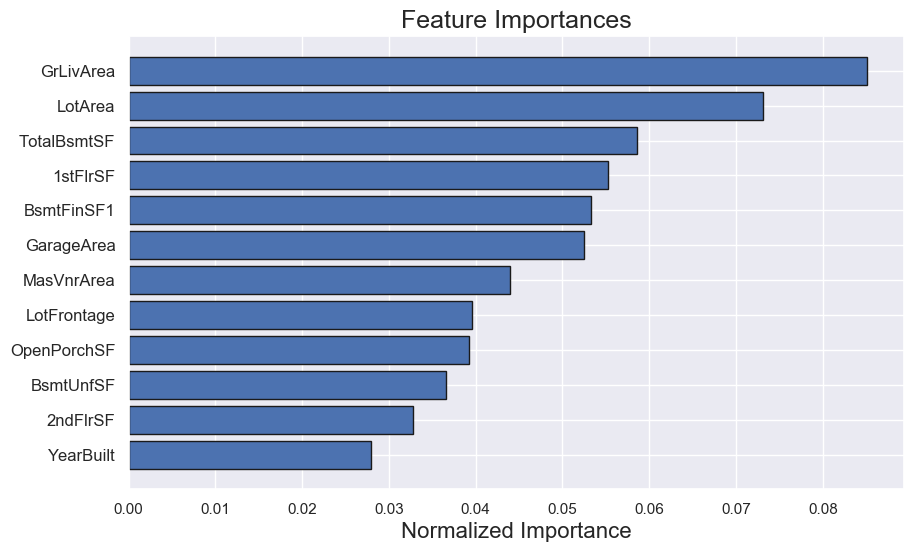

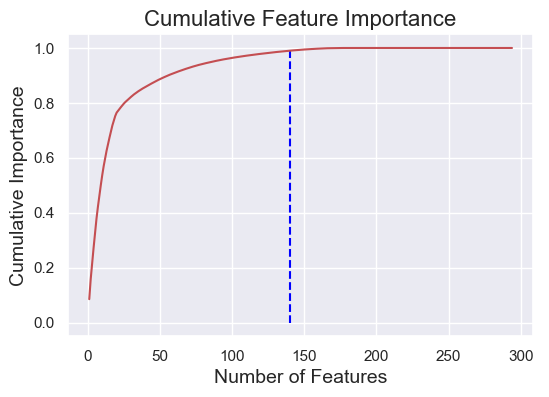

140 features required for 0.99 of cumulative importance


In [24]:
# Plotting most important features and viewing their cumulative importance
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [25]:
# Narrowing our features further based on the cumulative threshold of 99%
features_selective_refined = features[list(fs.feature_importances['feature']
                                           [fs.feature_importances.cumulative_importance < .99])]
features_selective_refined.shape

(1460, 139)

## VII. Refined Modeling Based on Select Features (Modeling Stage 2)

In [26]:
# Creating our new train-test split
X = features_selective_refined
y = features.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

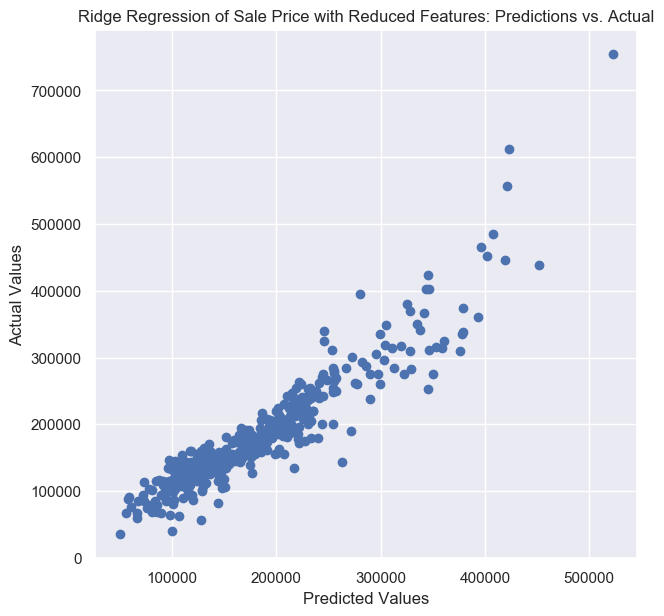


R-squared: 
 0.8680012551403327


In [27]:
# Creating Ridge Regression model
ridge = Ridge()
ridge.fit(X_train, y_train)

plt.figure(figsize=[7,7])
pred = ridge.predict(X_test)
plt.scatter(pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Ridge Regression of Sale Price with Reduced Features: Predictions vs. Actual')
plt.show()
print('\nR-squared: \n', ridge.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


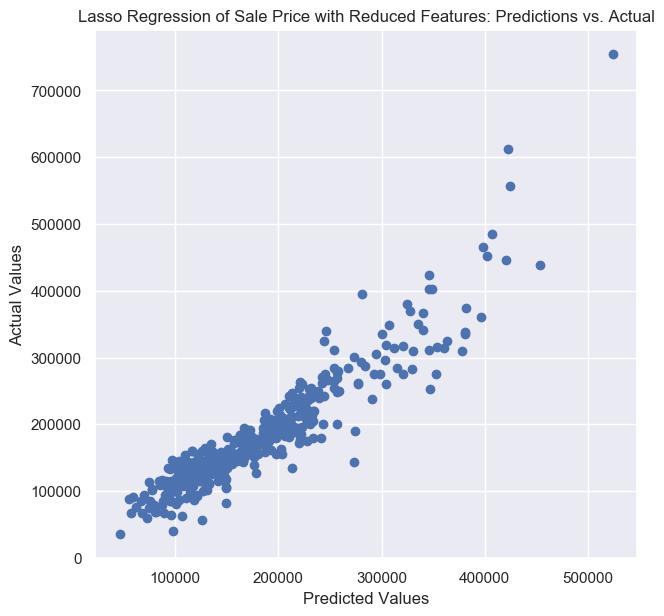


R-squared: 
 0.8657315436036026


In [28]:
# Creating lasso Regression model
lasso = Lasso()
lasso.fit(X_train, y_train)

plt.figure(figsize=[7,7])
pred = lasso.predict(X_test)
plt.scatter(pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Lasso Regression of Sale Price with Reduced Features: Predictions vs. Actual')
plt.show()
print('\nR-squared: \n', lasso.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


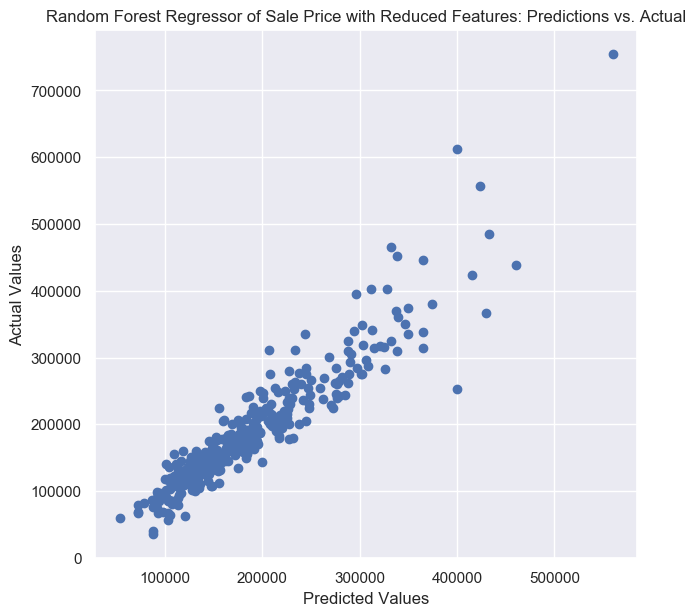


R-squared: 
 0.8729961061793878


In [29]:
# Creating Random Forest Regressor model
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

plt.figure(figsize=[7,7])
pred = rfr.predict(X_test)
plt.scatter(pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Random Forest Regressor of Sale Price with Reduced Features: Predictions vs. Actual')
plt.show()
print('\nR-squared: \n', rfr.score(X_test, y_test))

In [30]:
# Comparing new model scores with old model scores
model_scores_2 = pd.DataFrame()
model_scores_2['model'] = ['ridge','lasso','random_forest']
model_scores_2['scores'] = [ridge.score(X_test, y_test),
                         lasso.score(X_test, y_test),
                         rfr.score(X_test, y_test)]
print(model_scores)
model_scores_2

           model    scores
0         linear  0.338104
1            knn  0.702077
2          ridge  0.883477
3          lasso  0.878764
4  random_forest  0.881270
5            svm  0.813119


,model,scores
0,ridge,0.868001
1,lasso,0.865732
2,random_forest,0.872996


After the feature reduction, we still managed to stay within two points of the prediction score; by almost halving the features, we still were able to maintain adequate accuracy. For computational efficiency, this is a valuable insight; however, since we are currently concerned with the highest possible accuracy, we will use all features.

## VIII. Refined Modeling with Square Root of Target Variable (Modeling Stage 3)
More noticeable in the Ridge Regression example above, there seemed to be a slight exponential relationship between the predicted target values and the actual target values. Therefore, this modeling series will use the square root of house prices as the y-value.

In [31]:
# Creating our new train-test split with log target variable
X = features_selective_refined
y = np.sqrt(features.SalePrice)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state=42)

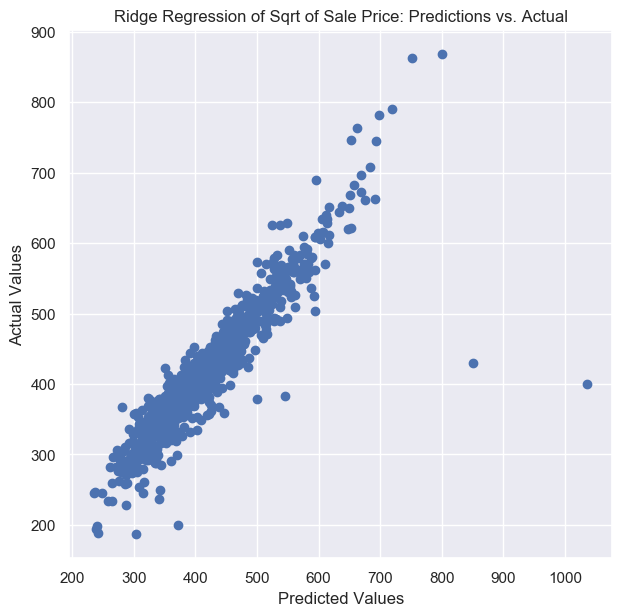


R-squared: 
 0.8372371943187946


In [32]:
# Creating Ridge Regression model
ridge = Ridge()
ridge.fit(X_train, y_train)

plt.figure(figsize=[7,7])
pred = ridge.predict(X_test)
plt.scatter(pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Ridge Regression of Sqrt of Sale Price: Predictions vs. Actual')
plt.show()
print('\nR-squared: \n', ridge.score(X_test, y_test))

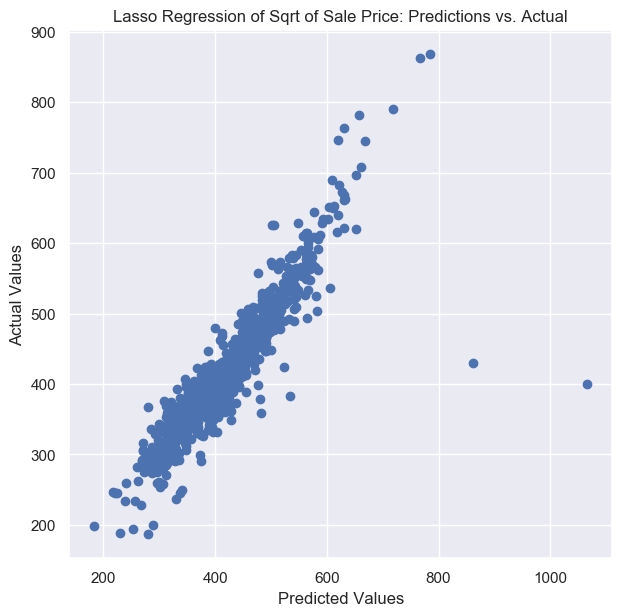


R-squared: 
 0.8188501372860401


In [33]:
# Creating lasso Regression model
lasso = Lasso()
lasso.fit(X_train, y_train)

plt.figure(figsize=[7,7])
pred = lasso.predict(X_test)
plt.scatter(pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Lasso Regression of Sqrt of Sale Price: Predictions vs. Actual')
plt.show()
print('\nR-squared: \n', lasso.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


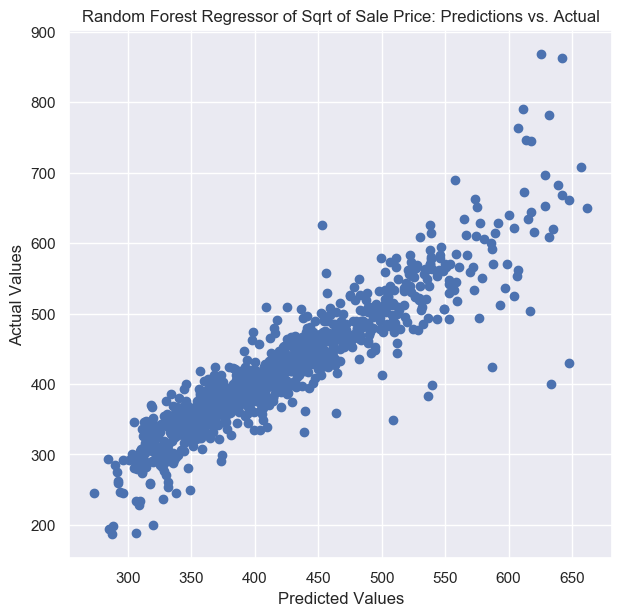


R-squared: 
 0.8344502940997689


In [34]:
# Creating Random Forest Regressor model
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

plt.figure(figsize=[7,7])
pred = rfr.predict(X_test)
plt.scatter(pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Random Forest Regressor of Sqrt of Sale Price: Predictions vs. Actual')
plt.show()
print('\nR-squared: \n', rfr.score(X_test, y_test))

In [35]:
model_scores_3 = pd.DataFrame()
model_scores_3['model'] = ['ridge','lasso','random_forest']
model_scores_3['scores'] = [ridge.score(X_test, y_test),
                            lasso.score(X_test, y_test),
                            rfr.score(X_test, y_test)]
print(model_scores_2)
model_scores_3

           model    scores
0          ridge  0.868001
1          lasso  0.865732
2  random_forest  0.872996


,model,scores
0,ridge,0.837237
1,lasso,0.818850
2,random_forest,0.834450


Across all three models, this change in the target variable seemed to reduce the accuracy. More evident in the Ridge and Lasso Regressions, this caused considerable outliers that were not present when the target variable was not adjusted. Moving forward we will use the pure target variable.

## IX. Creating New Features (Feature Engineering Stage 3)

In [36]:
# Simple observation of most important features via correlation to target
features_corr_matrix = features.corr()
correlating_features = features_corr_matrix['SalePrice'][features_corr_matrix['SalePrice'] > .4]
correlating_features = correlating_features.append(features_corr_matrix['SalePrice'][features_corr_matrix['SalePrice'] < -.4])
correlating_features

OverallQual             0.790982
YearBuilt               0.522897
YearRemodAdd            0.507101
MasVnrArea              0.472614
TotalBsmtSF             0.613581
1stFlrSF                0.605852
GrLivArea               0.708624
FullBath                0.560664
TotRmsAbvGrd            0.533723
Fireplaces              0.466929
GarageYrBlt             0.518287
GarageCars              0.640409
GarageArea              0.623431
SalePrice               1.000000
Neighborhood_NridgHt    0.402149
ExterQual_Ex            0.451164
ExterQual_Gd            0.452466
Foundation_PConc        0.497734
BsmtQual_Ex             0.553105
BsmtFinType1_GLQ        0.434597
HeatingQC_Ex            0.434543
KitchenQual_Ex          0.504094
GarageFinish_Fin        0.419678
ExterQual_TA           -0.589044
BsmtQual_TA            -0.452394
KitchenQual_TA         -0.519298
FireplaceQu_None       -0.471908
GarageFinish_Unf       -0.410608
Name: SalePrice, dtype: float64

### Exploring Potential New-Feature Options

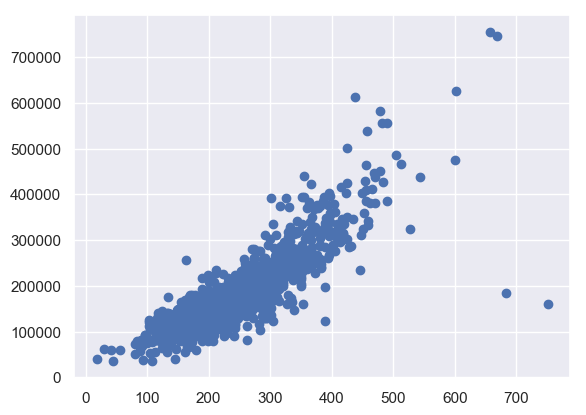

In [37]:
plt.scatter(np.sqrt(df.GrLivArea)*df.OverallQual, features.SalePrice)

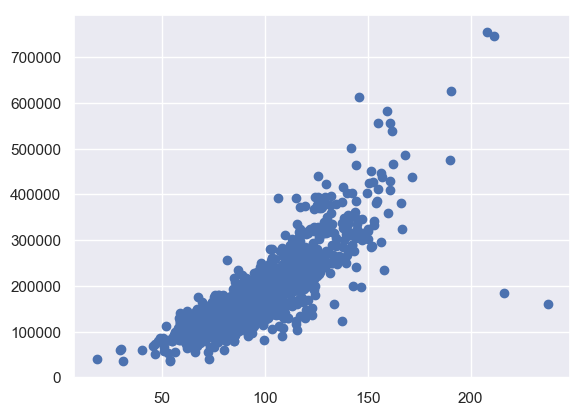

In [38]:
plt.scatter(np.sqrt(df.GrLivArea*df.OverallQual), features.SalePrice)

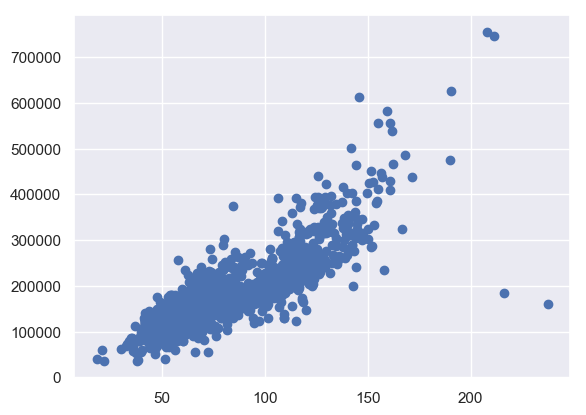

In [39]:
plt.scatter(np.sqrt((features.GrLivArea*features.OverallQual)/(1 + features.ExterQual_TA)), features.SalePrice)

In [40]:
features['ft_1_LivArea_x_Qual'] = np.sqrt(df.GrLivArea)*df.OverallQual
features['ft2_root_of_LivArea_x_Qual'] = np.sqrt(df.GrLivArea*df.OverallQual)
features['ft3_Area_x_Qual_div_Ext'] = np.sqrt((features.GrLivArea*features.OverallQual)/
                                                                (1 + features.ExterQual_TA))

In [41]:
features_corr_matrix = features.corr()
correlating_features = features_corr_matrix['SalePrice'][features_corr_matrix['SalePrice'] > .4]
correlating_features = correlating_features.append(features_corr_matrix['SalePrice'][features_corr_matrix['SalePrice'] < -.4])
correlating_features

OverallQual                   0.790982
YearBuilt                     0.522897
YearRemodAdd                  0.507101
MasVnrArea                    0.472614
TotalBsmtSF                   0.613581
1stFlrSF                      0.605852
GrLivArea                     0.708624
FullBath                      0.560664
TotRmsAbvGrd                  0.533723
Fireplaces                    0.466929
GarageYrBlt                   0.518287
GarageCars                    0.640409
GarageArea                    0.623431
SalePrice                     1.000000
Neighborhood_NridgHt          0.402149
ExterQual_Ex                  0.451164
ExterQual_Gd                  0.452466
Foundation_PConc              0.497734
BsmtQual_Ex                   0.553105
BsmtFinType1_GLQ              0.434597
HeatingQC_Ex                  0.434543
KitchenQual_Ex                0.504094
GarageFinish_Fin              0.419678
ft_1_LivArea_x_Qual           0.858979
ft2_root_of_LivArea_x_Qual    0.832527
ft3_Area_x_Qual_div_Ext  

## X. Refined Modeling with New Features (Modeling Stage 4)

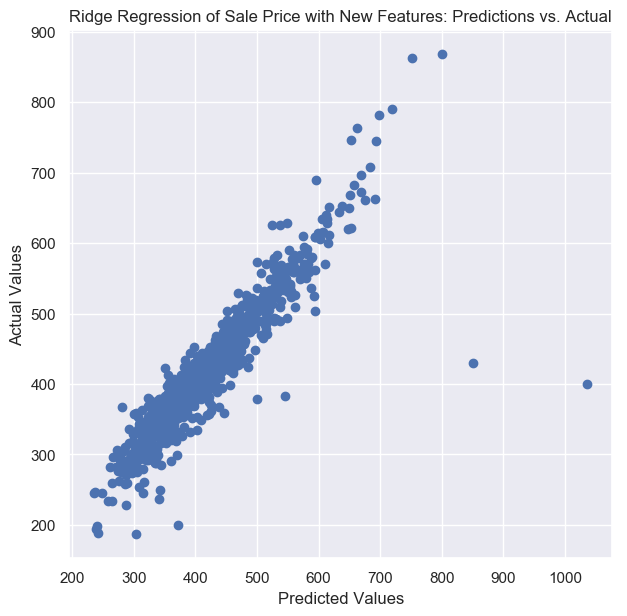


R-squared: 
 0.8372371943187946


In [42]:
# Creating Ridge Regression model
ridge = Ridge()
ridge.fit(X_train, y_train)

plt.figure(figsize=[7,7])
pred = ridge.predict(X_test)
plt.scatter(pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Ridge Regression of Sale Price with New Features: Predictions vs. Actual')
plt.show()
print('\nR-squared: \n', ridge.score(X_test, y_test))

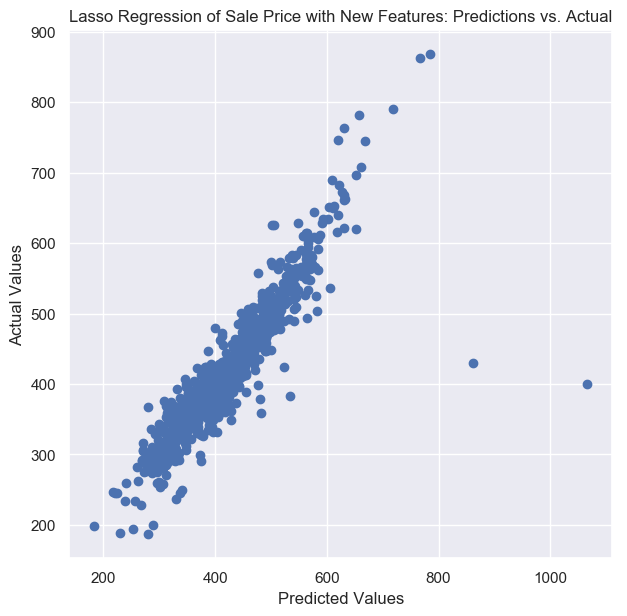


R-squared: 
 0.8188501372860401


In [43]:
# Creating lasso Regression model
lasso = Lasso()
lasso.fit(X_train, y_train)

plt.figure(figsize=[7,7])
pred = lasso.predict(X_test)
plt.scatter(pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Lasso Regression of Sale Price with New Features: Predictions vs. Actual')
plt.show()
print('\nR-squared: \n', lasso.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


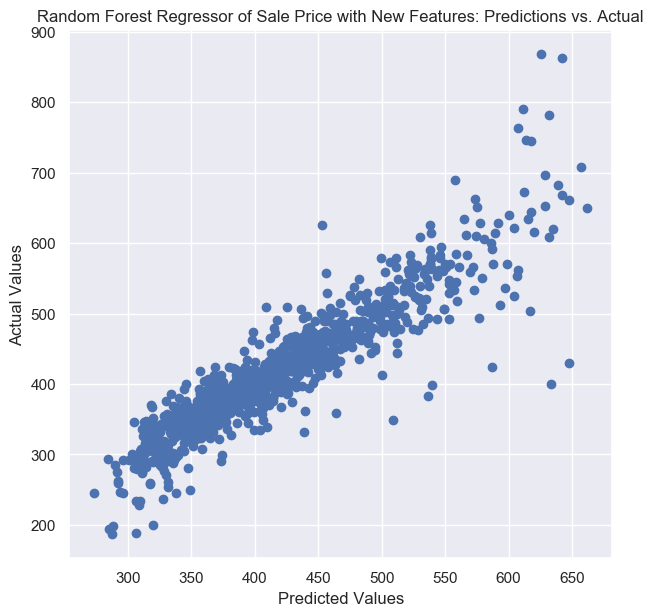


R-squared: 
 0.8344502940997689


In [44]:
# Creating Random Forest Regressor model
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

plt.figure(figsize=[7,7])
pred = rfr.predict(X_test)
plt.scatter(pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Random Forest Regressor of Sale Price with New Features: Predictions vs. Actual')
plt.show()
print('\nR-squared: \n', rfr.score(X_test, y_test))

The new features also detract from the accuracy of the models. Therefore, these will be removed.

### Benefits of New Features on OLS Linear Regression

In [45]:
# Creating train-test split for OLS Regression
X = features.drop('SalePrice',1)
y = features.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state=42)

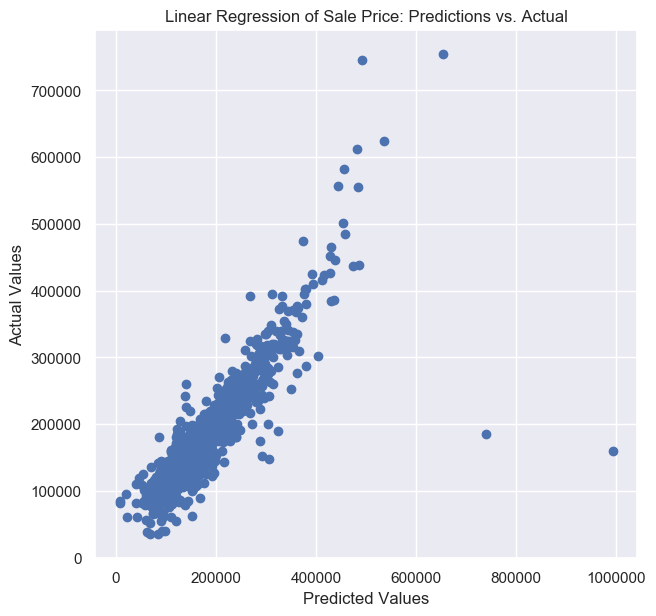


R-squared: 
 0.7186735550341807


In [46]:
# Creating multivariable linear model with new features
linear = LinearRegression()
linear.fit(X_train, y_train)

plt.figure(figsize=[7,7])
pred = linear.predict(X_test)
plt.scatter(pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Linear Regression of Sale Price: Predictions vs. Actual')
plt.show()
print('\nR-squared: \n', linear.score(X_test, y_test))

In [47]:
# Reloading the feature set
features = df

# Creating dummy features from categorical variables
dummy_feature_names = list(df.dtypes[df.dtypes == 'object'].index)
for x in dummy_feature_names:
    features = pd.concat([features.drop(x, axis=1), pd.get_dummies(df[x], prefix=x)], axis=1)

print(features.shape)

(1460, 300)


## X. Refined Modeling with Tuned Parameters (Modeling Stage 5)

In [48]:
# For Lasso and Random Forest, the highest performing model was with all features and unadjusted target variable
X = features.drop('SalePrice', 1)
y = features.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

### Ridge Regression

In [49]:
# Simple for loop to find best alpha parameter for Ridge Regression
for x in np.arange(0.0, .25, 0.01):
    ridge = Ridge(alpha=x)
    ridge.fit(X_train, y_train)
    print(x, ':', ridge.score(X_test,y_test))

0.0 : -8.41375014565817e+17
0.01 : 0.8784676453284318
0.02 : 0.8857755057969993
0.03 : 0.8877884197182585
0.04 : 0.8887661067100667
0.05 : 0.8893560978001046
0.06 : 0.8897456948915489
0.07 : 0.8900112443584093
0.08 : 0.8901915284262064
0.09 : 0.8903094052220756
0.1 : 0.890379785781136
0.11 : 0.890413098278948
0.12 : 0.8904169969538425
0.13 : 0.8903972954557166
0.14 : 0.890358520158689
0.15 : 0.8903042605511362
0.16 : 0.8902374031818829
0.17 : 0.8901602946184611
0.18 : 0.890074858876323
0.19 : 0.8899826843823385
0.2 : 0.8898850898181909
0.21 : 0.8897831748842301
0.22 : 0.8896778600281408
0.23 : 0.8895699179294764
0.24 : 0.8894599987169168


In [50]:
# Applying best parameter to model
ridge = Ridge(alpha=.12)
ridge.fit(X_train, y_train)
print(ridge.score(X_test,y_test))

0.8904169969538425


### Lasso Regression

In [51]:
# Creating random grid to find the best paramters for Lasso Regression
alpha = list(np.linspace(0, 5, 41))
tol = list(np.linspace(.0001, .001, 101))

random_grid = {'alpha': alpha,
               'tol': tol}

In [52]:
# Testing all options to find best parameters
lasso = Lasso()
lasso_random = RandomizedSearchCV(estimator = lasso, 
                                  param_distributions = random_grid, 
                                  n_iter = 100, 
                                  cv = 3, 
                                  verbose=2, 
                                  random_state=42, 
                                  n_jobs = -1)

lasso_random.fit(X_train, y_train)
lasso_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   30.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


{'tol': 0.000991, 'alpha': 1.375}

In [53]:
# Applying best parameters to Lasso Regression
lasso = Lasso(tol=0.000991, alpha=1.375)

lasso.fit(X_train, y_train)
lasso.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.8806402750681906

### Random Forest Regression

In [54]:
# Creating random grid to find the best paramters for Random Forest Regressor

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(50, 100, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [55]:
# Testing all options to find best parameters
rfr = RandomForestRegressor()
# Random search of parameters: uses 3-fold cross-validation, 100 different combinations, and all available cores
rf_random = RandomizedSearchCV(estimator = rfr, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

rf_random.fit(X_train, y_train)
rf_random.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 15.4min finished


{'n_estimators': 1444,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 55,
 'bootstrap': False}

In [56]:
# Applying best parameters to Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=1111, min_samples_split=2, min_samples_leaf=2,
                           max_features='auto', max_depth=80, bootstrap=True, random_state=42)

rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.8939403877138444

### Cross-Validation Scores

In [57]:
ridge_scores = cross_val_score(ridge, X, y, cv=5)
print(ridge_scores)
ridge_scores.mean()

[0.84938347 0.82395844 0.83693667 0.88563536 0.65819134]


0.8108210553875145

In [58]:
lasso_scores = cross_val_score(lasso, X, y, cv=5)
print(lasso_scores)
lasso_scores.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

[0.85994897 0.82470896 0.81599196 0.88924955 0.64920994]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.8078218740893339

In [59]:
rfr_scores = cross_val_score(rfr, X, y, cv=5)
print(rfr_scores)
rfr_scores.mean()

[0.87143391 0.84538508 0.8721624  0.88515552 0.79261567]


0.8533505172021376

As much as I would prefer having a model that provides a little more insight into the algorithm, Random Forest consistently proves to be the winner with every example. Moving forward, we will only be tuning this model.

## XI. Feature Selection (Feature Engineering Stage 4)
The best performing models used all of the features. Limiting our model options to Random Forest, we are going to use feature selection to try and remove some of the noise in the data with irrelevant features.

In [60]:
# Creating temporary dataframe to find optimal number of features for RFR model
foo = pd.DataFrame()
X_train, X_test, y_train, y_test = train_test_split(features.drop('SalePrice',1), 
                                                    features.SalePrice, 
                                                    test_size = 0.3, 
                                                    random_state=42)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

# Labeling and sorting dataframe
foo['features'] = X.columns
foo['importance'] = rfr.feature_importances_
foo_order = foo.sort_values(by='importance', ascending=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [61]:
# Running for loop to find which number of features provides greatest accuracy (having already tested full span of features)
for x in np.arange(150, 185, 1):
    best = list(foo_order[:x].features)
    X_train, X_test, y_train, y_test = train_test_split(features[best], features.SalePrice, test_size = 0.3, random_state=42)
    rfr = RandomForestRegressor(n_estimators=100, random_state=42)
    rfr.fit(X_train, y_train)
    print(x, ':', rfr.score(X_test, y_test))

150 : 0.8978788261846068
151 : 0.8971771440407764
152 : 0.8969655184058075
153 : 0.898381995981639
154 : 0.8974693153583948
155 : 0.8958205933908711
156 : 0.895936076038909
157 : 0.8950171947359085
158 : 0.8968615632849541
159 : 0.8945522866655232
160 : 0.900174896759658
161 : 0.8938713682315489
162 : 0.8981590752549174
163 : 0.8929701704471815
164 : 0.898118544762844
165 : 0.8943354411592968
166 : 0.8936351000590449
167 : 0.8953894973726637
168 : 0.8933731377861268
169 : 0.8985871851838955
170 : 0.8925889706277632
171 : 0.8948846605477746
172 : 0.8956551114421352
173 : 0.898264827142001
174 : 0.896370519810136
175 : 0.8968953130159083
176 : 0.8975975849567691
177 : 0.8962238017993476
178 : 0.8957300491579671
179 : 0.8945742569758032
180 : 0.8986881600018519
181 : 0.8954768680457876
182 : 0.8965608611864337
183 : 0.8946862581694441
184 : 0.8976245861450123


## XII. Random Forest Modeling with Selective Features (Modeling Stage 6)

In [62]:
# Applying optimal amount of features for model
best = list(foo_order[:160].features)

X = features[best]
y = features.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

### Retuning Parameters for Selective Features

In [63]:
# Setting up random_grid for retuning
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [64]:
rfr = RandomForestRegressor()
# Random search of parameters: uses 3-fold cross-validation, 100 different combinations, and all available cores
rf_random = RandomizedSearchCV(estimator = rfr, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.7min finished


{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [65]:
# Applying best parameters
rfr = RandomForestRegressor(n_estimators=400, min_samples_split=2, min_samples_leaf=1,
                           max_features='sqrt', max_depth=None, bootstrap=False, random_state=42)

rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.8896789840582955

In [66]:
# Assessing cross-validation of Random Forest
rfr_scores = cross_val_score(rfr, X, y, cv=5)
print(rfr_scores)
rfr_scores.mean()

[0.89962908 0.84577284 0.85639018 0.8942335  0.84849345]


0.8689038104700053

## XIII. Ridge Regresssion Modeling for Cross-Validation (Modeling Stage 7)

In [67]:
# Loading all features for Ridge model
X = features.drop('SalePrice', 1)
y = features.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [68]:
# Applying best parameter to model
ridge = Ridge(alpha=.12)
ridge.fit(X_train, y_train)
print(ridge.score(X_test,y_test))

0.8904169969538425


In [69]:
# Assessing cross-validation for Ridge
ridge_scores = cross_val_score(ridge, X, y, cv=5)
print(ridge_scores)
ridge_scores.mean()

[0.84938347 0.82395844 0.83693667 0.88563536 0.65819134]


0.8108210553875145

## XIV. The Model's Value

### Model Analysis
#### Strengths
Even though the Random Forest model does not provide as much insight as to how the predicted features were derived, it was consistently and undeniably the better performer of the considered models above. Moreover, after specialized tuning, it was the only model with potential to perform with a score above 90% with a train-test split.

Moreover, when tested in a 5-fold cross-validation, the model's score showed little variance when compared to the cross-validation results of ridge and lasso regression (which often showed one fold score performing as low as 20 points lower than the other folds). However, this cross-validation came with an overall decrease of about 3 points (most likely because the training sets were smaller - which seems to be an overall hindrance in this dataset).

#### Weaknesses
As alluded above, the Random Forest Regressor - while a very accurate model - does not provide the same degree of insight that a type of linear regression would provide. The model is able to accurately distinguish the most valuable features and leverage those insights for a consistently accurate score; however, for the statistician who is interested to know *why* the model made the choices it did, this black-box model doesn't provide that high-level of clarity. For this reason, it may be useful to complement this model with another close-performing model like Ridge Regression.

### Model Value
With the model above, we could provide the home buyer or seller in Ames, Iowa, with a model that would enable them to make their choices from a more informed perspective. For those outside of this geographical location, the model would undoubtedly require further tuning, but the code above certainly provides a direction of confidence for anyone looking to purchase or sell a home.